# Preliminaries

## Dataset

In this set of exercises we will use the same dataset as from [week 3](week_3.ipynb). 


As before, we provide the data already curated in the following two files:

`RNA_expression_curated.csv`: [148 cell lines , 238 genes]

`drug_response_curated.csv`: [148 cell lines , YM155 drug]

The curated data can be read as `pandas` `DataFrame` in the following way:

In [1]:
import pandas as pd

gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

The goal of the exercises is to train support vector machine (SVM) and random forests classifiers on this dataset and explore and learn about their hyperparameters. 

## Tools

The `scikit-learn` library provides the required tools for support vector machines, as well as for random forest algorithms.

In [2]:
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs, make_circles
from sklearn.metrics import classification_report

Before proceeding, look up the documentation of the imported functions and read about their basic functionality. Below, we list some important parameters of SVMs and random forests that can be tuned during training.

#### Support Vector Machines (SVM)

`C`: error term.

`kernel`: similarity function ('linear', 'poly', 'sigmoid' or 'rbf')

`gamma`: kernel coef. for 'rbf', 'poly' and 'sigmoid' kernels. It can be thought of as the ‘spread’ of the kernel and therefore the decision region.

`degree`: degree for the 'poly' kernel.

`coef0`: independt term in the 'poly' and 'sigmoid' kernels


#### Random Forests

`n_estimators`: number of trees in our random forest.

`max_depth`: maximum number of levels in each decision tree

`max_features`: maximum number of features to consider per split in an individual tree.

`min_sample_leaf`: minimum number of data points per leaf node

`min_samples_split`: minimum number of data points placed in a node before the node is split

`oob_score`: the out-of-bag (OOB) error is the average error for each observation calculated using predictions from the trees that do not contain that observation in their respective bootstrap sample. Set this parameter to true.

`bootstrap`: method for sampling data points (with or without replacement). Set this parameter to true.

`criterion`: function used to measure the quality of the split (e.g. 'entropy' or 'gini')

# Exercises

## Support vector machines

The  `make_blobs` and `make_circles` functions can be used to generate linearly and not linearly separable toy datasets. 

In [3]:
# data generation: linearly separable
X, Y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=1234)
X = pd.DataFrame(X, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

The following code illustrates how to train a linear SVM classifier and plot the data points, the separating hyperplane, the support vectors and the margins that pass through them (considering the training data)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# build the model
model = svm.SVC(kernel='linear', random_state=33)
model.fit(X_train, Y_train)

# create plot
fig, ax = plt.subplots()

# get colors from qualitative colormap 'Paired'
cmap = plt.cm.get_cmap('Paired')

# plot data points
ax.scatter(X_train.iloc[Y_train == 1, 0], X_train.iloc[Y_train == 1, 1],
           c=[cmap(11)], label='1')
ax.scatter(X_train.iloc[Y_train == 0, 0], X_train.iloc[Y_train == 0, 1],
           c=[cmap(0)], label='0')
ax.legend(loc='best')

# plot the decision function
# create grid to evaluate model
x1_min, x1_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
x2_min, x2_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(x1_min, x1_max, .2),
                     np.arange(x2_min, x2_max, .2))

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Establish the class for each point in the contour
Z = model.predict(xy).reshape(XX.shape)

# Visualization of the contour
ax.contourf(XX, YY, Z, cmap='bwr', alpha=0.3)

# plot support vectors, whose are responsible for building the margins
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', marker='s')

ax.axis([x1_min, x1_max, x2_min, x2_max])
plt.axis('tight')
plt.title('Linear kernel SVM')
plt.show()

<Figure size 640x480 with 1 Axes>

Train a radial basis function (RBF) SVM classifier with `gamma=0.5` and plot the results in the same way.

In [5]:
# data generation: not linearly separable
X, Y = make_circles(n_samples=200, noise=0.05, random_state=1234)
X = pd.DataFrame(X, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

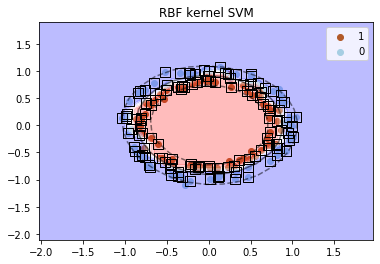

In [6]:
# Create a SVC classifier using an RBF kernel
model = svm.SVC(kernel='rbf', gamma=.5)
# Train the classifier
model.fit(X_train, Y_train)

import numpy as np
import matplotlib.pyplot as plt
# create plot
fig, ax = plt.subplots()

# get colors from qualitative colormap 'Paired'
cmap = plt.cm.get_cmap('Paired')

# plot data points
ax.scatter(X_train.iloc[Y_train == 1, 0], X_train.iloc[Y_train == 1, 1],
           c=[cmap(11)], label='1')
ax.scatter(X_train.iloc[Y_train == 0, 0], X_train.iloc[Y_train == 0, 1],
           c=[cmap(0)], label='0')
ax.legend(loc='best')

# plot the decision function
# create grid to evaluate model
x1_min, x1_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
x2_min, x2_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(x1_min, x1_max, .2),
                     np.arange(x2_min, x2_max, .2))

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Establish the class for each point in the contour
Z = model.predict(xy).reshape(XX.shape)

# Visualization of the contour
ax.contourf(XX, YY, Z, cmap='bwr', alpha=0.3)

# plot support vectors, whose are responsible for building the margins
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', marker='s')

ax.axis([x1_min, x1_max, x2_min, x2_max])
plt.axis('tight')
plt.title('RBF kernel SVM')
plt.show()

<p><font color='#770a0a'>When should a RBF kernel be used over a linear kernel? Motivate your answer.</font></p>
A linear kernel can be used when there is a linear classification problem. When there is a nonlinear classification problem, a RBF kernen should be used over a linear kernel.


<p><font color='#770a0a'>Do we need to normalize the data before using a kernel function? Motivate your answer.
</font></p>
Yes, the svm assumes that the data has values in a range between -1 and 1. 

## Predicting drug response on cell lines from gene expression data with SVMs

Explore the hyper-parameter space of an SVM classifier with cross-validation for the Genomics of Drug Sensitivity in Cancer (GDSC) dataset. The`GridSearchCV` function can be used to specify a grid of parameter values with the `param_grid` parameter.

In [7]:
import pandas as pd
from sklearn import svm 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

X_train,X_test,Y_train,Y_test=train_test_split(gene_expression,drug_response, test_size=0.2, random_state=42)

#normalization
X_train_norm = preprocessing.normalize(X_train)
Y_train_norm = preprocessing.normalize(Y_train)
X_test_norm = preprocessing.normalize(X_test)
Y_test_norm = preprocessing.normalize(Y_test)


#cross validation
parameters = {'kernel':('linear', 'rbf')}
model = svm.SVC(gamma="scale")
grid = GridSearchCV(model, param_grid=parameters, cv = 5)  #find the optimum degree, 5-fold cross-validation
grid.fit(X_train_norm,Y_train_norm.ravel())
best_alpha = grid.best_params_
print("The best alpha =", best_alpha)

The best alpha = {'kernel': 'rbf'}


C:\Users\naomi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Calculate the precision of your predictions, and compare your calculations with the results of `classification_report`, which displays many classification metrics.

In [8]:
# precision tp / (tp + fp)
Y_pred = grid.best_estimator_.predict(X_test_norm)  
Y_pred = np.reshape(Y_pred, (30, 1))
TP = sum((Y_test_norm == 1) & (Y_pred == 1))
FP = sum((Y_test_norm == -1) & (Y_pred == 1))
TN = sum((Y_test_norm == -1) & (Y_pred == -1))
FN = sum((Y_test_norm == 1) & (Y_pred == -1))

precision_1 = TP / (TP + FP)
precision_min1 = TN / (TN + FN)
print('The precision of -1 =', precision_min1)
print('The precision of 1 =', precision_1)



The precision of -1 = [0.85714286]
The precision of 1 = [1.]


In [9]:
#classification repot
print(classification_report(Y_test_norm, Y_pred))

              precision    recall  f1-score   support

        -1.0       0.86      1.00      0.92        24
         1.0       1.00      0.33      0.50         6

    accuracy                           0.87        30
   macro avg       0.93      0.67      0.71        30
weighted avg       0.89      0.87      0.84        30



The calculated values for the precisions and the precisions as result of the classification_report are the same

## Random forests

Follow the same steps as for SVM. Compare the two algorithms and report which one has better performance.

In [10]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report

gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

X_train,X_test,Y_train,Y_test=train_test_split(gene_expression,drug_response, test_size=0.2, random_state=42)

#normalization
X_train_norm = preprocessing.normalize(X_train)
Y_train_norm = preprocessing.normalize(Y_train)
X_test_norm = preprocessing.normalize(X_test)
Y_test_norm = preprocessing.normalize(Y_test)

rfc = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rfc.fit(X_train_norm, Y_train_norm.ravel());

Y_pred = rfc.predict(X_test_norm)

print(classification_report(Y_test_norm, Y_pred))

              precision    recall  f1-score   support

        -1.0       0.86      1.00      0.92        24
         1.0       1.00      0.33      0.50         6

    accuracy                           0.87        30
   macro avg       0.93      0.67      0.71        30
weighted avg       0.89      0.87      0.84        30



When looking at the classification_reports of both methods, the obtained values are the same so we concluded that the performance is equal.



The random forests classifiers allows to perform feature selection. Evaluate the importance of features extracting the top 50 informative features. A bar plot (`plt.bar()`) can be a useful tool to visualize this. 


['ABCB1', 'PRSS3', 'MUC13', 'KRT7', 'MIR205HG', 'KRT20', 'INHBB', 'FBP1', 'TSPAN8', 'SYCP2', 'TM4SF4', 'CDH17', 'EPS8L3', 'EDN1', 'VAMP8', 'PHGR1', 'PLOD2', 'MYCN', 'ESRP2', 'NUPR1', 'LYZ', 'CDX2', 'IRX3', 'CLRN3', 'FABP1', 'MYC', 'S100A9', 'RARRES3', 'GNG11', 'LGALS4', 'C3', 'BST2', 'ANXA4', 'PLBD1', 'RAB17', 'S100P', 'PTN', 'TNFSF10', 'VIM', 'MAL2', 'DSP', 'CAV2', 'ACSL5', 'NEFL', 'ANXA3', 'C19orf33', 'DFNA5', 'QPRT', 'MX1', 'PRR15L']


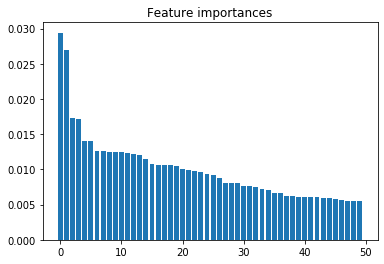

In [11]:
# feature importance
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
important_indices = indices[:50];
X50 = X_test.iloc[:,important_indices]
Names = list(X50.columns) 

plt.figure()
plt.title("Feature importances")
plt.bar(range(X50.shape[1]), importances[important_indices])
print(Names)



## Biomedical applications

Driven by technological advances, there has recently been a dramatic increase in availability of biomedical data. Machine learning approaches are well suited to take advantage of this data and have been widely applied to many areas of biology. 

Example of these applications are genome annotation, biomarker identification, systems biology, genome data analysis, protein  function  prediction, protein  structure prediction, protein localization prediction, identification of protein interactions and drug discovery.

SVM and RF methods are among the most popular machine learning methods applied in bioinformatics or computational biology.

Perform a literature search and find a biomedical study in which SVM or RF is applied to obtain certain insights. <p><font color='#770a0a'>Explain the motivation behind using that specific algorithm in the study.
</font></p>

Alickovic, E., & Subasi, A. (2016). Medical decision support system for diagnosis of heart arrhythmia using DWT and random forests classifier. Journal of medical systems, 40(4), 108.

In this study they used the Random Forest method to detect cardiovascular disorders and in this cases specific for arrhythmia (irregular electrical signals originated from the heart). For CVD it is of importance to find an accurate and fast approach that can automaticaly classify the signals of an ECG. 

One of the major problems in the development of an automatic ECG method is that it is related to the preprocessing module. Noise in the ECG data could harm the signal given in the ECG and therefore also the classification. So you keep clear of this the researcher used Multiscale Principal Component Analysis to de-noise the data. 
Feature extraction of the ECG data is done by Discrete Wavelet Transform (DWT). "DWT is a linear operator that decomposes the signal into numerous components at different frequency bands". 

RF makes use of a group of classification trees. The data of every classification tree is acheived with the use of bootstrapping. And therefore the random trees make use of the bagging method. It is of importance to grow all trees completely so a low-bias is achieved. When these trees are combined together in a RF it makes sure that you get a low-bias and low-variance approach. The RF has exceptional performs in classification problems due to the following properties:
-it can be applied when the amount of of variables is higher than the amount of observations
-it can be used for multi-class problems
-the prognosic performance is good
-it gives no overfitting of the data
-it can combine categorical and continious pedictors together
When the RF is used for a classification problem it receives a prediction vote of all individual trees and than perform the majority votes procedure on the outcomes given. 

The use of RF resulted in the fact of the highest F-measure, ROC-area and accuracy relative to other classifiers used (CART and C4.5). It did not matter if they used the Multiscale Principal Component Analysis de-noise procedure, because with and without it the RF out performed the other two classifiers. 
The accuracy of this classifier was around the 99.5%. 